## project_nutrients_review_negative

In [102]:
import numpy as np

In [103]:
# project_nutrients_review_negative.csv
import pandas as pd
df_review_negative = pd.read_csv('../datasets/reviews_data/all_preprocess_negative.csv')

In [104]:
df_review_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           709 non-null    int64  
 1   product_name         709 non-null    object 
 2   review_date          709 non-null    object 
 3   review_content       709 non-null    object 
 4   review_star          709 non-null    float64
 5   review_writer        709 non-null    object 
 6   reveiw_replaced      709 non-null    object 
 7   stopremoved_reviews  709 non-null    object 
 8   okt_reviews          703 non-null    object 
 9   replaced_review      703 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 55.5+ KB


In [105]:
df_review_negative = df_review_negative.dropna()

### LDA 분석

##### 문장 벡터화

In [106]:
from gensim.corpora import Dictionary

In [107]:
# df_review_negative dictionary
dictionary = Dictionary(df_review_negative[['replaced_review']].values)
dictionary

In [108]:
dictionary.doc2bow(df_review_negative[['replaced_review']].values[3])

[(3, 1)]

In [109]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_negative[['replaced_review']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [110]:
df_review_negative['문장벡터화'] = corpus_list

In [111]:
df_review_negative.columns

Index(['Unnamed: 0', 'product_name', 'review_date', 'review_content',
       'review_star', 'review_writer', 'reveiw_replaced',
       'stopremoved_reviews', 'okt_reviews', 'replaced_review', '문장벡터화'],
      dtype='object')

##### 토픽 잡기
- review_negative.csv 토픽 분석
- 토픽 수 9 <<<<<<< 변경하기

In [112]:
from gensim.models import LdaModel

In [113]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=9)

In [114]:
lda_model.print_topics(num_words=4)

[(0,
  '0.011*"배송 성능 유통 기한" + 0.007*"구입 구매 함량 따다 나우 푸드 프로 추측 하다 야하다 식품 계산 라면 이익 보고 리뷰 수정 스완슨 물약 취급 받다 쿠팡 댓글 호기심 이유 하나 좋다 알약 로켓 역시 싸다 비교 반응 민감하다 체질 밀크 시슬 먹다 저절로 효과 결론 진리" + 0.004*"아쉽다 천원 안쪽 남편 복용 먹기" + 0.004*"배송 성능 보통 유통 기한 선물 구매 박스 포장 택배 먹기 다시 구입"'),
 (1,
  '0.067*"가격 배송 보통" + 0.061*"배송 보통 성능 유통 기한" + 0.020*"가격 배송" + 0.020*"배송 성능 유통 기한"'),
 (2,
  '0.032*"배송 보통 성능 별로 유통 기한" + 0.026*"배송 성능 별로 유통 기한" + 0.013*"유통 기한 보통 포장 상태" + 0.010*"유통 기한 포장 상태 별로"'),
 (3,
  '0.031*"가격 안 배송" + 0.029*"배송 성능 보통 유통 기한" + 0.018*"가격 안 배송 보통" + 0.015*"가격 배송"')]

##### 최적에 토픽 단어 수

In [115]:
sentences = df_review_negative['replaced_review']
sentences

0      배송 보통 성능 별로 유통 기한 감마 리놀렌산 효능 어떻다 제약회사 제품 여성 갱년...
1                                   배송 성능 별로 유통 기한 효과 전혀
2                  가격 배송 보통 브리 캐나다 감마 리놀렌산 보라 오일 달맞이꽃 자유
3                                    부작용 안나 는걸 다행 야하다 가요
4                                                     성능
                             ...                        
704                                       배송 보통 유통 기한 별로
705                              배송 보통 성능 별로 유통 기한 얼마 효과
706                                          배송 유통 기한 효과
707                       배송 성능 별로 유통 기한 박스 피로 회복 안되다 느낌
708                          배송 성능 별로 유통 기한 보통 호불호 먹기 포기
Name: replaced_review, Length: 703, dtype: object

In [116]:
type(sentences)

pandas.core.series.Series

In [117]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [118]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['배송',
  '보통',
  '성능',
  '별로',
  '유통',
  '기한',
  '감마',
  '리놀렌산',
  '효능',
  '어떻다',
  '제약회사',
  '제품',
  '여성',
  '갱년기',
  '효과',
  '유독',
  '상품',
  '가격',
  '회사',
  '비교',
  '함유',
  '개월',
  '거기',
  '캡슐',
  '판매',
  '하다',
  '구입'],
 ['배송', '성능', '별로', '유통', '기한', '효과', '전혀'],
 ['가격', '배송', '보통', '브리', '캐나다', '감마', '리놀렌산', '보라', '오일', '달맞이꽃', '자유'],
 ['부작용', '안나', '는걸', '다행', '야하다', '가요'],
 ['성능'],
 ['배송',
  '성능',
  '별로',
  '유통',
  '기한',
  '보통',
  '보라',
  '오일',
  '달맞이꽃',
  '갱년기',
  '증상',
  '효능',
  '회사',
  '비교',
  '감마',
  '리놀렌산',
  '함유',
  '가격',
  '개월',
  '제품',
  '거기',
  '판매',
  '하다',
  '구입',
  '일류',
  '낱개',
  '포장',
  '보관',
  '온도',
  '저렴하다',
  '용량',
  '냉장고'],
 ['가격', '배송'],
 ['배송', '보통', '성능', '별로', '유통', '기한'],
 ['가격', '안', '배송', '타다'],
 ['배송', '성능', '별로', '유통', '기한', '와이프'],
 ['가격', '배송', '보통'],
 ['인지질',
  '좋다',
  '아시',
  '닥터',
  '크릴',
  '오일팔',
  '표현',
  '레시틴',
  '함량',
  '북극해',
  '생태계',
  '살리다',
  '오일'],
 ['쭈욱', '먹다', '제품', '절때', '할인', '주문'],
 ['배송',
  '성능',
  '별로',
  '유통',
  '기한',
  '박스',
  '혈

In [119]:
preprocessed_sentences = morphs_list

In [120]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [121]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.6830332869673377

In [122]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-7.709866151393995

In [123]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [124]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.604941,-8.248102
1,0.682285,-8.553808
2,0.709759,-8.791961
3,0.662062,-8.930176
4,0.683119,-9.139076
5,0.687842,-9.254902
6,0.686882,-9.365566
7,0.660515,-9.449969
8,0.650642,-9.594357


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

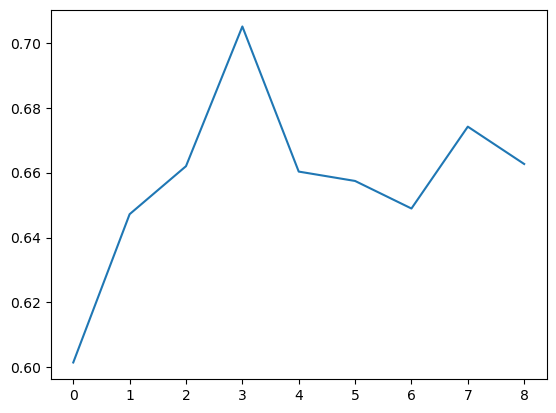

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

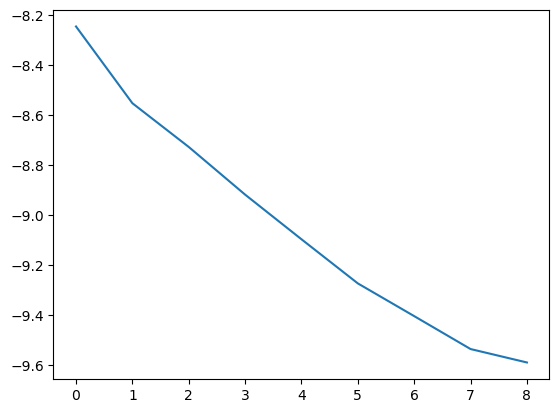

In [25]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [26]:
# %pip install pyLDAvis

In [27]:
import pyLDAvis.gensim_models

In [29]:
lda_model.num_topics

4

In [30]:
len(dictionary)

2184

In [33]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [34]:
pyLDAvis.display(result_visualized)

In [ ]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, '../project_nutrients_review_negative_result_visualized.html')